<a href="https://colab.research.google.com/github/memelordmaddy/WiDS-2023/blob/main/week3pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.log_softmax(self.fc3(x), dim=1)
        return x


In [4]:
model = NeuralNetwork()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
def train(model, train_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()


In [6]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

In [8]:
train(model, train_loader, criterion, optimizer)
accuracy = test(model, test_loader)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 92.62%


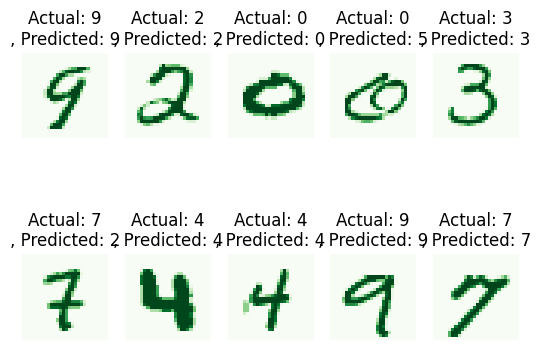

In [13]:
import matplotlib.pyplot as plt
import numpy as np
def visualize_predictions(model, test_loader, num_samples=10):
    model.eval()
    all_indices = list(range(len(test_loader.dataset)))
    sample_indices = np.random.choice(all_indices, num_samples, replace=False)

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            if i * len(inputs) > max(sample_indices):
                break

            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            for j in range(inputs.size(0)):
                index = i * len(inputs) + j
                if index not in sample_indices:
                    continue

                image = inputs[j].numpy().reshape(28, 28)
                actual_label = labels[j].item()
                predicted_label = predicted[j].item()

                plt.subplot(2, num_samples // 2, len(sample_indices) - sample_indices.tolist().index(index))
                plt.imshow(image, cmap='Greens')
                plt.title(f"Actual: {actual_label}\n, Predicted: {predicted_label}")
                plt.axis('off')

        plt.show()

visualize_predictions(model, test_loader)